# Convolutional Neural Network

## Import statements

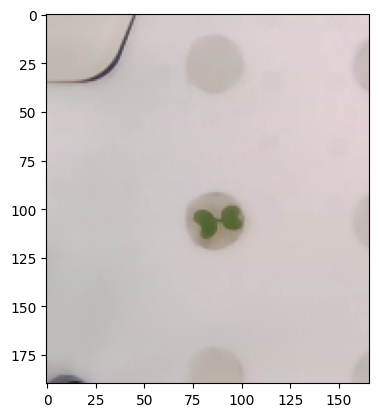

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import print_np_array_properties

import cv2
import numpy as np

%matplotlib inline


image = mpimg.imread('./data/rgbd_plant/rgb_00_000_00.png')

plt.imshow(image)

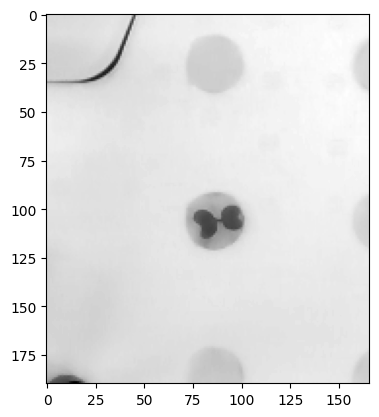

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap = 'gray')

## Covolution Kernal

=============== np array Properties =============

np array:
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
np array_dtype: int64
np array_shape: (4, 4)
np array_size: 16

=============== np array Properties =============

np array:
 [[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]
np array_dtype: int64
np array_shape: (4, 4, 4)
np array_size: 64

=============== np array Properties =============

np array:
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
np array_dtype: int64
np array_shape: (4, 4)
np array_size: 16

=============== np array Properties =============

np array:
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]
np array_dtype: int64
np array_shape: (4, 4)
np array_size: 16

=============== np array Properties ==========

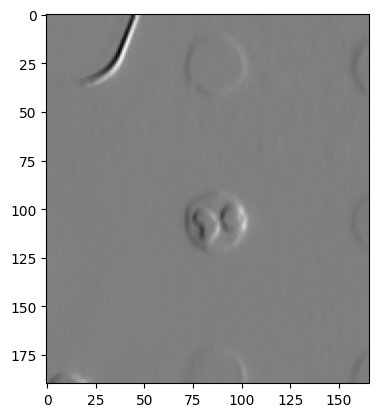

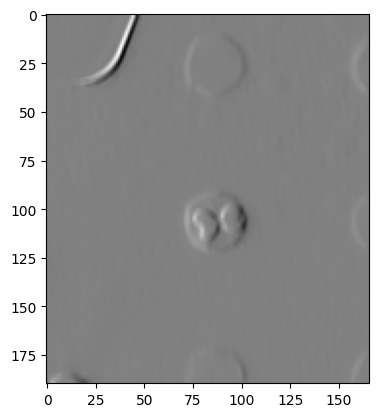

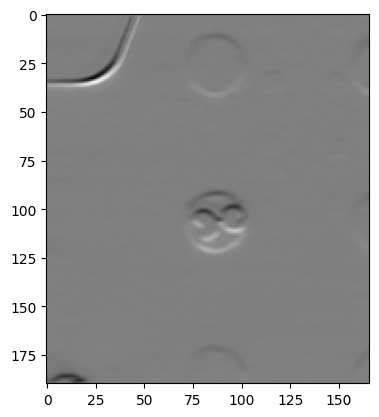

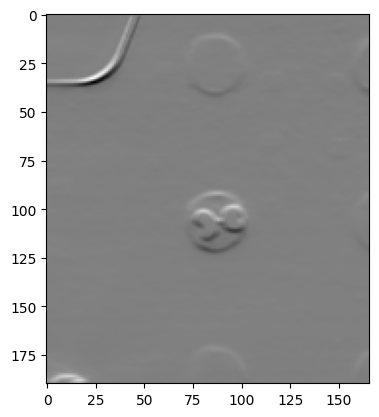

In [3]:
filter_vals = np.array([[-1,-1,1,1],
                        [-1,-1,1,1],
                        [-1,-1,1,1],
                        [-1,-1,1,1]
                       ])

print_np_array_properties(filter_vals)


filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = np.array([filter_1,filter_2,filter_3,filter_4])
print_np_array_properties(filters)


for filter in filters:
    
    print_np_array_properties(filter)
    x = cv2.filter2D(gray, -1, filter)
    plt.figure()
    plt.imshow(x, cmap='gray')

## Convolutional Layer and Max pooling Layer

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        
        k_height, k_width = weight.shape[2:]
        
        self.conv = nn.Conv2d(1,4, kernel_size=(k_height, k_width), bias = False)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv.weight = torch.nn.Parameter(weight)
        
        
    def forward(self,x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        
        return conv_x, activated_x, pooled_x
    
print_np_array_properties(filters)

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

print(weight.shape[2:])

print_np_array_properties(weight)

model = Net(weight)

print(model)
        

=============== np array Properties =============

np array:
 [[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]
np array_dtype: int64
np array_shape: (4, 4, 4)
np array_size: 64

torch.Size([4, 4])
=============== np array Properties =============

np array:
 tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])

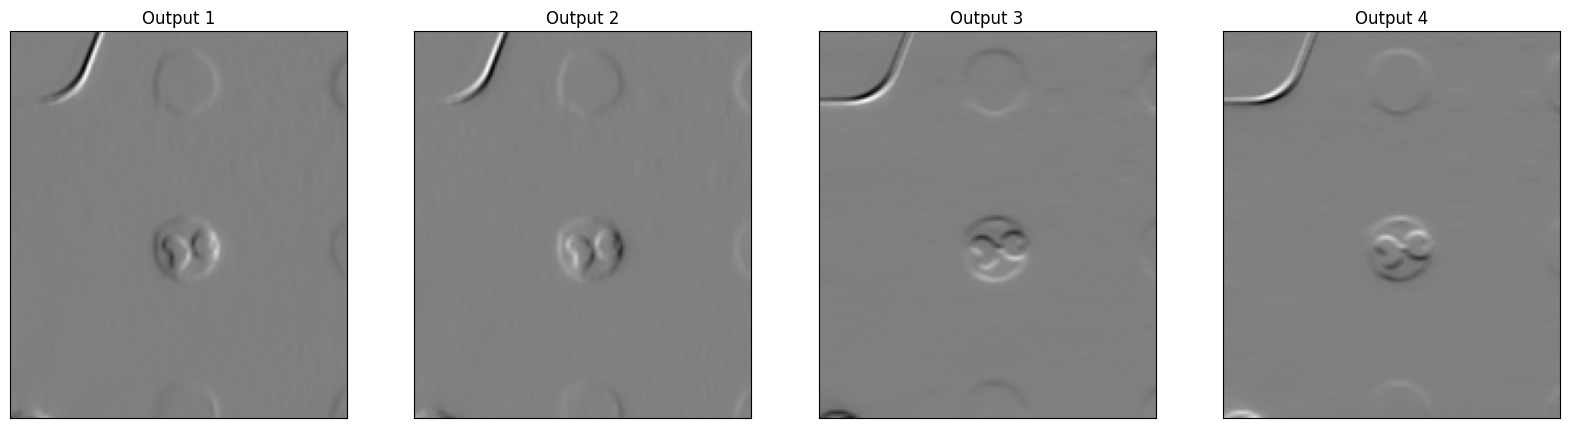

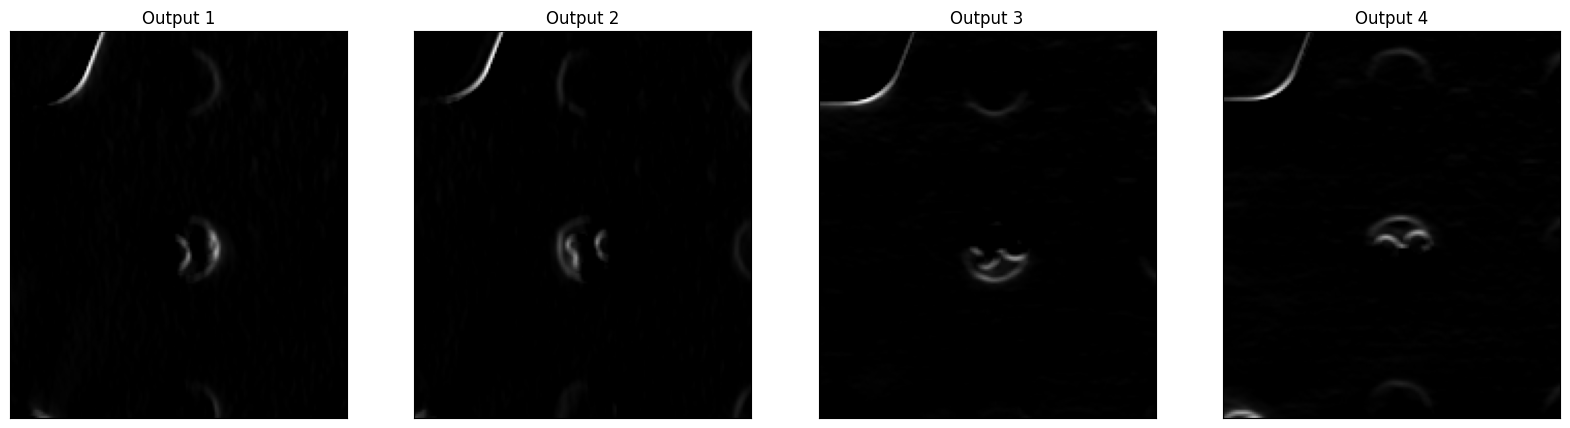

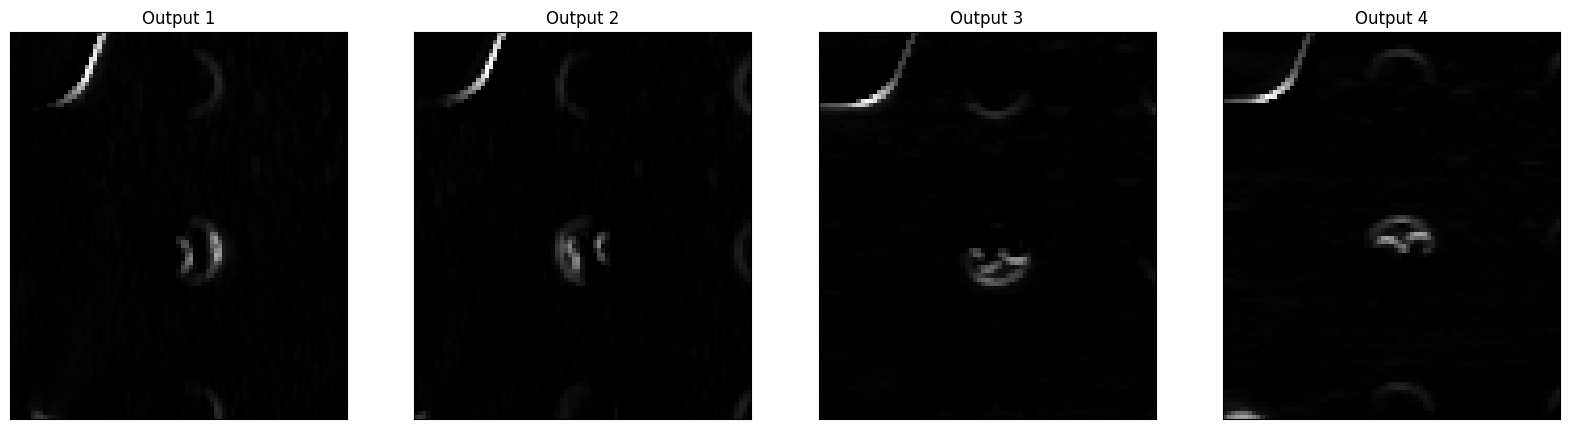

In [5]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))



gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

viz_layer(conv_layer)
viz_layer(activated_layer)
viz_layer(pooled_layer)

## Conventional CNN Architecture

### Import statements + device + util functions

In [12]:
import torch
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
%matplotlib inline


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Available Device: {device}')


def split_validation(data):
    
    valid_len = len(data)//2
    test_len = len(data) - valid_len
    valid_data, test_data = torch.utils.data.random_split(data, [valid_len , test_len])
    
    return valid_data, test_data


def imshow(img):
    img = img/2 +0.5
    
    plt.imshow(np.transpose(img, (1,2,0))) # convert from tensor to image

Available Device: cuda


### Datasets

Files already downloaded and verified
Files already downloaded and verified


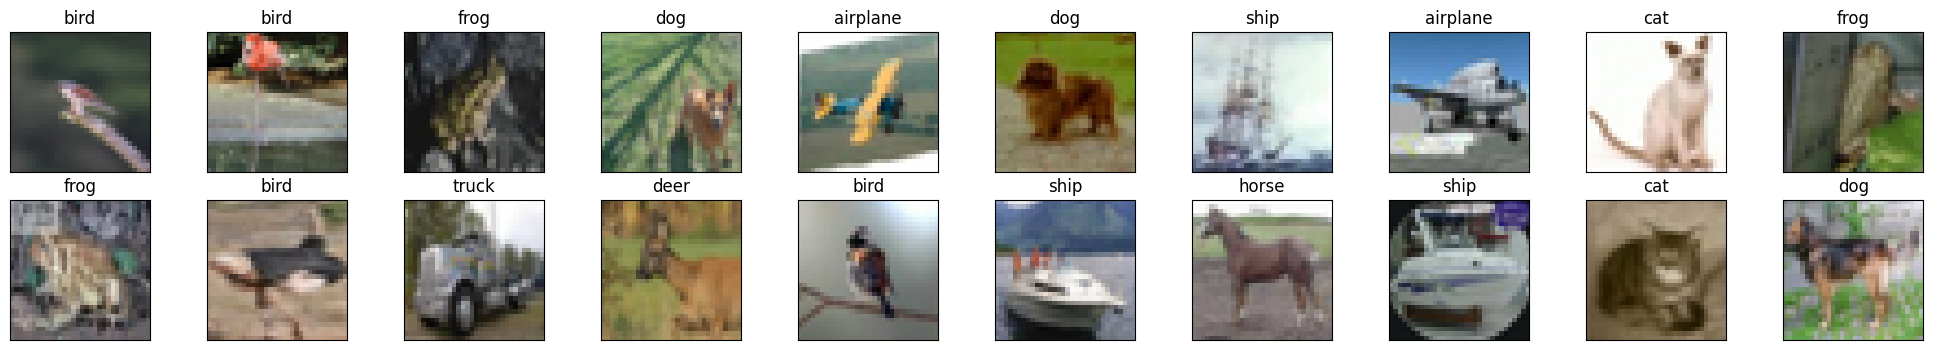

In [13]:
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2


## Define preprocessing transformation applied to data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

train_data = datasets.CIFAR10(
    root='data',
    train=True,
    download=True,
    transform=transform)

validation_data = datasets.CIFAR10( 
    root='data',
    train=False,
    download=True,
    transform=transform)

valid_data, test_data = split_validation(validation_data)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']


dataiter = iter(train_loader)
images, label = next(dataiter)

fig = plt.figure(figsize=(25,4))

for i in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size/2), i+1, xticks=[], yticks=[])
    imshow(images[i])
    ax.set_title(classes[label[i]])
    

### Architecture

In [14]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.features = nn.Sequential(
            
            nn.Conv2d(3, 16, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(16, 32, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(32, 64, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.classifier = nn.Sequential( nn.Dropout(0.25),
                                         nn.Linear(64*4*4, 500),
                                         nn.ReLU(),
                                         nn.Dropout(0.25),
                                         nn.Linear(500, 10)
                                        )
        
    def forward(self,x):
        x = self.features(x)
        
        x = x.view(-1, 64*4*4) #Flatten
        
        x = self.classifier(x)
        
        return x

### Define Model and optimizer

In [15]:
import torch.optim as optim

model = CNN().to(device)
print(model)

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


CNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=500, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=500, out_features=10, bias=True)
  )
)


### Training Loop

In [16]:
n_epochs=30

valid_loss_min = np.Inf

for epoch in range(1, n_epochs):
    
    train_loss=0.0
    valid_loss=0.0
    
    ## Training Step
    model.train()
    for data, target in train_loader:
        
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad() # clar the gradients of all optimized variables
        output = model(data) # Forward pass
        
        loss = loss_func(output, target) # calculate loss of the forward pass
        
        loss.backward() #calculate gradients based on the loss
        
        optimizer.step() # update weights
        
        train_loss += loss.item()*data.size(0)
    ## Validation Step
    
    model.eval()
    for data, target in valid_loader:
        data, target = data.to(device), target.to(device)
        
        output = model(data) # forward pass
        
        loss = loss_func(output, target)
        
        valid_loss += loss.item() * data.size(0)
    
    # calculate Average loss
    train_loss = train_loss/len(train_loader.dataset) 
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    #Print progress statement
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
    
    #Save model with the lowest validation loss
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        torch.save(model.state_dict(), './data/model_cifar.pt')
        valid_loss_min = valid_loss
    
    

Epoch: 1 	Training Loss: 2.023733 	Validation Loss: 1.650718
Validation loss decreased (inf --> 1.650718).  Saving model ...
Epoch: 2 	Training Loss: 1.559072 	Validation Loss: 1.438893
Validation loss decreased (1.650718 --> 1.438893).  Saving model ...
Epoch: 3 	Training Loss: 1.393159 	Validation Loss: 1.290507
Validation loss decreased (1.438893 --> 1.290507).  Saving model ...
Epoch: 4 	Training Loss: 1.271388 	Validation Loss: 1.190492
Validation loss decreased (1.290507 --> 1.190492).  Saving model ...
Epoch: 5 	Training Loss: 1.173423 	Validation Loss: 1.120419
Validation loss decreased (1.190492 --> 1.120419).  Saving model ...
Epoch: 6 	Training Loss: 1.087536 	Validation Loss: 1.031873
Validation loss decreased (1.120419 --> 1.031873).  Saving model ...
Epoch: 7 	Training Loss: 1.015916 	Validation Loss: 0.990404
Validation loss decreased (1.031873 --> 0.990404).  Saving model ...
Epoch: 8 	Training Loss: 0.955160 	Validation Loss: 0.934773
Validation loss decreased (0.99040

### Testing Model

In [18]:
model.load_state_dict(torch.load('./data/model_cifar.pt'))

test_loss = 0.0

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


model.eval()

for data, target in test_loader:
    
    data,target = data.to(device), target.to(device)
    
    output = model(data)
    
    loss = loss_func(output,target)
    
    test_loss += loss.item()*data.size(0)
    
    _, pred = torch.max(output,1) ## Most Likely solution
    
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.to('cpu').numpy())
    
    
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] +=1

## Average test loss

test_loss = test_loss/ len(test_loader.dataset)

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
        
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


Test Accuracy of airplane: 79% (388/491)
Test Accuracy of automobile: 87% (446/509)
Test Accuracy of  bird: 62% (318/509)
Test Accuracy of   cat: 58% (277/470)
Test Accuracy of  deer: 78% (385/489)
Test Accuracy of   dog: 63% (297/469)
Test Accuracy of  frog: 85% (427/498)
Test Accuracy of horse: 78% (409/521)
Test Accuracy of  ship: 89% (459/512)
Test Accuracy of truck: 86% (461/532)

Test Accuracy (Overall): 77% (3867/5000)


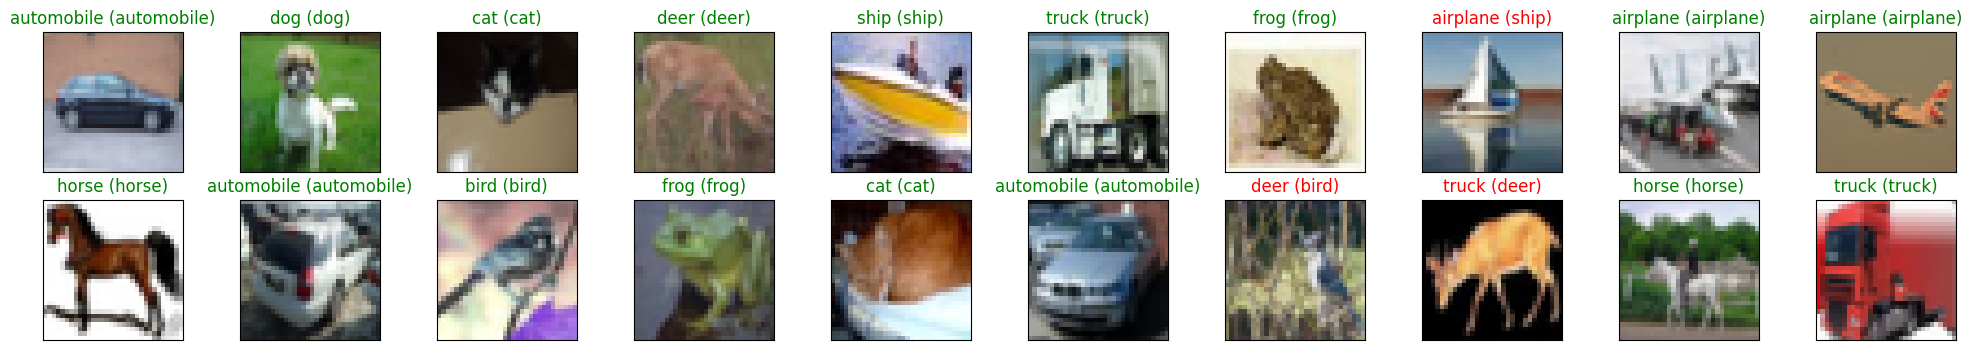

In [24]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images.numpy()

# move model inputs to cuda, if GPU available
images = images.to(device)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.to('cpu').numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size/2), idx+1, xticks=[], yticks=[])
    imshow(images[idx].to('cpu'))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))